# Milestone 1
* This is a preliminary milestone to let you set up goals for your final project and assess the feasibility of your ideas. Please, fill the following sections about your project. (max. 2000 characters per section)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [0]:
sns.set(color_codes=True)

In [14]:
''' Comment this if not using Google Colab '''
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset


* Find a dataset (or multiple) that you will explore. Assess the quality of the data it contains and how much preprocessing / data-cleaning it will require before tackling visualization. We recommend using a standard dataset as this course is not about scraping nor data processing.

## Problematic

* Frame the general topic of your visualization and the main axis that you want to develop.

  * What am I trying to show with my visualization?
  * Think of an overview for the project, your motivation, and the target audience.

## Exploratory Data Analysis

* Pre-processing of the data set you chose:

  * Show some basic statistics and get insights about the data

In [0]:
df_stats = pd.read_csv('drive/My Drive/pokemon/dataset_stats.csv')
df_abilities = pd.read_csv('drive/My Drive/pokemon/dataset_abilities.csv')
df = pd.read_csv('drive/My Drive/pokemon/first6gens.csv')

In [16]:
df.shape

(721, 44)

There are 721 pokemon with 44 features in our dataset, which includes the first 6 generations of Pokemon.

### Feature-group 1
1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
	•	type1: The Primary Type of the Pokemon
	•	type2: The Secondary Type of the Pokemon
	•	classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
	•	height_m: Height of the Pokemon in metres
	•	weight_kg: The Weight of the Pokemon in kilograms
	•	capture_rate: Capture Rate of the Pokemon
	•	abilities: A stringified list of abilities that the Pokemon is capable of having
	•	experience_growth: The Experience Growth of the Pokemon

### Feature-group 2
1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS



	•	against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
	•	hp: The Base HP of the Pokemon
	•	attack: The Base Attack of the Pokemon
	•	defense: The Base Defense of the Pokemon
	•	sp_attack: The Base Special Attack of the Pokemon
	•	sp_defense: The Base Special Defense of the Pokemon
	•	speed: The Base Speed of the Pokemon
	•	is_legendary: Denotes if the Pokemon is legendary.
	•	Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).

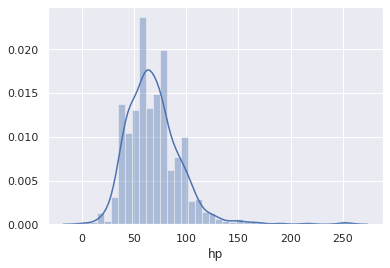

In [20]:
sns.distplot(df['hp']);

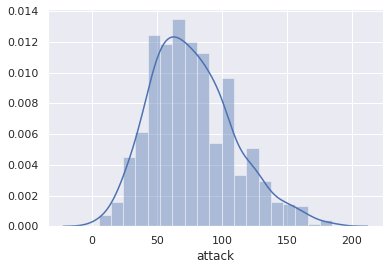

In [21]:
sns.distplot(df['attack']);

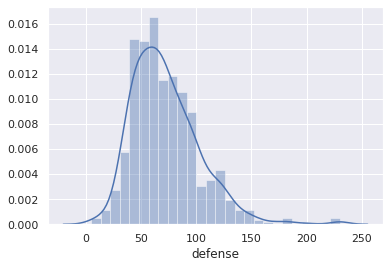

In [22]:
sns.distplot(df['defense']);

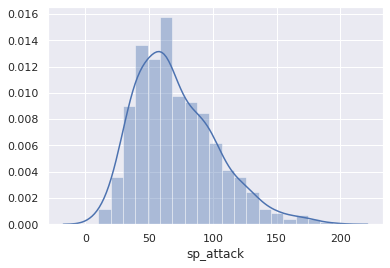

In [23]:
sns.distplot(df['sp_attack']);

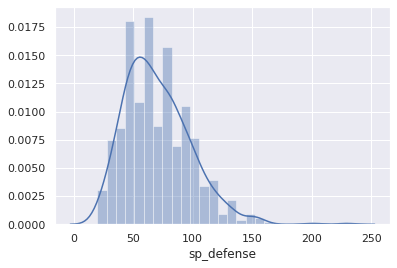

In [25]:
sns.distplot(df['sp_defense']);

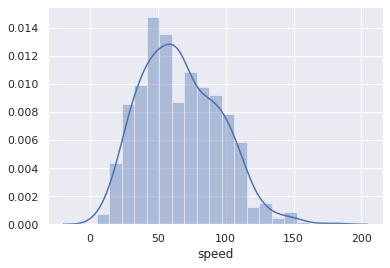

In [26]:
sns.distplot(df['speed']);

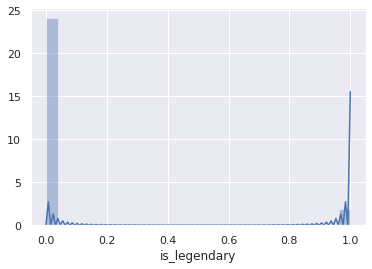

In [27]:
sns.distplot(df['is_legendary']);

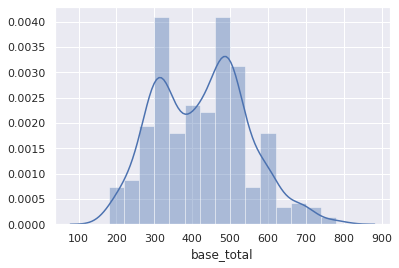

In [30]:
sns.distplot(df['base_total']);

#### Against_?

There are 19 against_? categories. 

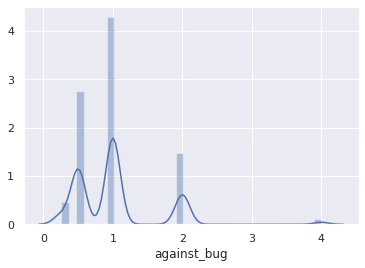

In [32]:
sns.distplot(df['against_bug']);

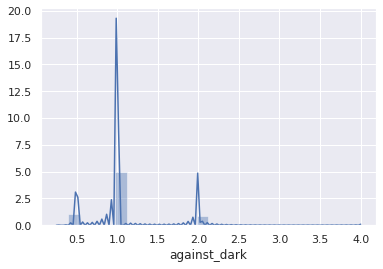

In [33]:
sns.distplot(df['against_dark']);

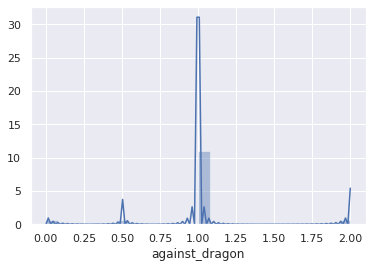

In [34]:
sns.distplot(df['against_dragon']);

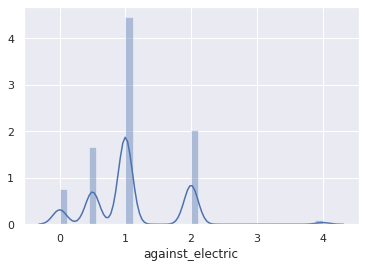

In [35]:
sns.distplot(df['against_electric']);

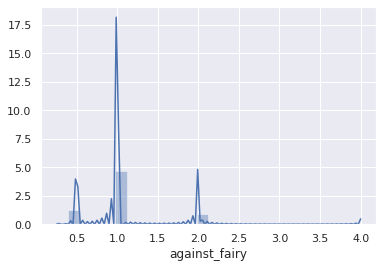

In [36]:
sns.distplot(df['against_fairy']);

In [0]:
# TODO: Add a new column that is the sum of all against_? columns and plot its distribution

### Feature-group 3

1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	base_happiness: Base Happiness of the Pokemon
	•	Color. Color of the Pokémon according to the Pokédex.
	•	hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
	•	EggGroup1. Egg Group of the Pokémon.
	•	EggGroup2. Second Egg Group of the Pokémon, in case it has two.
	•	baseeggsteps: The number of steps required to hatch an egg of the Pokemon
	•	hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
	•	Body_Style. Body Style of the Pokémon according to the Pokédex.


## Related Work

* What others have already done with the data?
* Why is your approach original?
* What source of inspiration do you take? Visualizations that you found on other websites or magazines (might be unrelated to your data).
* In case you are using a dataset that you have already explored in another context (ML or ADA course, semester project...), you are required to share the report of that work to outline the differences with the submission for this class.